## __*Adinda Syarifatul Muna*__
### __164231043__
### __SD-A2__

## 1. Dengan data SeoulBikeData.csv, aplikasikan regresi linier untuk memprediksi berapa
jumlah penyewa sepeda di kota Seoul jika temperature kota berada pada suhu berikut ini:

a. 20 celcius

b. 25 celcius

c. 30 celcius

d. 15 celcius

e. 17 celcius

In [126]:
# ANALISIS REGRESI LINEAR ->MENGHASILKAN jumlah perental sepeda dari suhu yang dicari(perharinya)

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#### __Subset data___

- membuat variabel df untuk membaca file SeoulBikeData menggunakan library pandas
- panggil df untuk menampilkan beberapa filenya 

In [127]:
df= pd.read_csv('SeoulBikeData.csv')
df

,Date,Rented Bike Count,Temperature,Humidity,Wind speed,Rainfall
0,01-12-17,254,-5.2,37,2.2,0.0
1,01-12-17,204,-5.5,38,0.8,0.0
2,01-12-17,173,-6.0,39,1.0,0.0
3,01-12-17,107,-6.2,40,0.9,0.0
4,01-12-17,78,-6.0,36,2.3,0.0
...,...,...,...,...,...,...
8755,30-11-18,1003,4.2,34,2.6,0.0
8756,30-11-18,764,3.4,37,2.3,0.0
8757,30-11-18,694,2.6,39,0.3,0.0
8758,30-11-18,712,2.1,41,1.0,0.0


subset data dengan soal yang diberikan, yaitu temperature sebagai X dan Rental Bike Count sebagai y

X di reshape agar menjadi bentuk 2D karena model hanya bisa memprediksi dalam bentuk 2D

In [128]:
X= df['Temperature'].values
y= df['Rented Bike Count'].values

#reshape data menjadi array 2D
X = X.reshape(-1,1)

### __Membagi data train dan data test (70% dan 30%)__

- membagi data set menajdi data test dan data training diperlukan untuk data berukuran besar agar mendapatkan evaluasi yang lebih akurat dan adil terhadap kinerja model pada data yang tidak pernah dilihat sebelumnya. karena tidak semua data digunakan untuk training masih disisakan data untuk testing

- dibagi 30% data untuk data testing dan 70% data untuk data training

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### __Model regresi__

- membuat model regresi dengan library dari sklearn yaitu linearRegression menggunakan data X_train dan y_train
- menampilkan koefisien regresi(B0) dan intercept(B1) dengan

print(f'Koefisien: {modelreg.coef_[0]}')
print(f'Intercept: {modelreg.intercept_}')

In [130]:
# Train the linear regression model
modelreg = LinearRegression()
modelreg.fit(X_train, y_train)

# Menampilkan koefisien regresi dan intercept
print(f'Koefisien: {modelreg.coef_[0]}')
print(f'Intercept: {modelreg.intercept_}')

Koefisien: 29.076458809766127
Intercept: 328.4087186952063


### __Membuat persamaan regresi__

In [131]:
print(f'persamaan regresi: y ={modelreg.intercept_} + {modelreg.coef_[0]}x')

persamaan regresi: y =328.4087186952063 + 29.076458809766127x


### __Memprediksi jumlah perental sepeda__

menampilkan prediksi jumlah perental sesuai dengan temperatur yang diberikan.
- menggunakan fungsi dengan parameter suhu dan model regresi
- suhu di resshape menjadi 2D agar bisa dibaca oleh model
- for i in suhu, i nya di reshape lagi menjadi 2D
- a = model.predict(i) -> membuat prediksi model dari i 
- lalu terakhir print (f'Jumlah perental sepeda pada Temperature {int(i)}°C ada {int(a.round())} orang') 

In [136]:
def prediksi(suhu, model):
    suhu = np.array(suhu).reshape(-1,1)         # di reshape karena model membutuhkan 2D bukan 1D
    for i in (suhu):
        i=i.reshape(-1,1)
        a = model.predict(i)
        print(f'Jumlah perental sepeda pada Temperature {int(i)}°C ada {int(a.round())} orang')

suhu = [20, 25, 30, 15, 17]
prediksi(suhu,modelreg) 



Jumlah perental sepeda pada Temperature 20°C ada 910 orang
Jumlah perental sepeda pada Temperature 25°C ada 1055 orang
Jumlah perental sepeda pada Temperature 30°C ada 1201 orang
Jumlah perental sepeda pada Temperature 15°C ada 765 orang
Jumlah perental sepeda pada Temperature 17°C ada 823 orang


### __Menampilkan R Square__

R square yang didapatkan hanya sekitar 30% sehingga variabel x hanya berpengaruh sebesar 30% pada variabel y dan 70% dipengaruhi oleh faktor lain. 
oleh karena itu data prediksi jumlah perental sepeda mungkin masih berbeda jauh dari data aslinya

In [89]:

from sklearn.metrics import r2_score

y_pred = modelreg.predict(X_test)
# Hitung R-squared
r_squared = r2_score(y_test, y_pred)

# Tampilkan nilai R-squared
print(f"R-squared: {(r_squared*100).round()}%")


R-squared: 30.0%


### 2. Menggunakan library sklearn, kita dapat mengaplikasikan multiple regression dengan mudah. Beberapa variabel independen dapat menentukan nilai prediksi variabel dependen
jika kita memiliki data yang cukup. Dengan data SeoulBikeData-complete.csv, 
### aplikasikan regresi linier untuk memprediksi berapa jumlah penyewa sepeda di kota Seoul dengan
ketentuan variabel independen sebagai berikut:

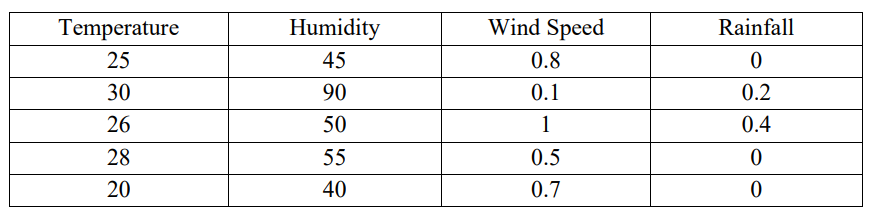

menentukan prediksi perental sepeda dengan beberapa variabel independen yang ada di dalam tabel

### __Membuat model regresi__

menggunakan regresi linear berganda karena x nya lebih  dari 1
- menggunakan library statmodels untuk menampilkan OLS Regresi
- penjelasan ada di comment code

In [92]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# import data
df = pd.read_csv('SeoulBikeData.csv')

# Subset data sesuai dengan x dan y pada soal
x = df[['Temperature', 'Humidity', 'Wind speed', 'Rainfall']]
y = df['Rented Bike Count']

# Membagi x test dan x train dengan rasio 3:7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# membuat konstanta untuk model
x_train = sm.add_constant(x_train)
x_test= sm.add_constant(x_test)

# membuat model regresi
result = sm.OLS(y_train, x_train).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     941.0
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        21:50:03   Log-Likelihood:                -46921.
No. Observations:                6132   AIC:                         9.385e+04
Df Residuals:                    6127   BIC:                         9.389e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         705.1325     27.377     25.756      

### __R square__

hasilnya didapatkan R square sebesar 38% sehingga variabel x hanya berpengaruh sebesar 30% pada variabel y dan 70% dipengaruhi oleh faktor lain. 
oleh karena itu data prediksi jumlah perental sepeda mungkin masih berbeda jauh dari data aslinya

### __Persamaan regresi__

membuat persamaan regresi sesuai dengan b0, b1, b2, b3, b4 yang telah didapatkan dari persamaan regresi diatas. menggunakan result.params untuk memanggilnya


In [113]:
print(f"Persamaan regresi: Y = {result.params[0]} + {result.params[1]}X1 + {result.params[2]}X2 + {result.params[3]}X3 + {result.params[4]}X4")

Persamaan regresi: Y = 705.1325034396627 + 31.427064042495367X1 + -7.9197015767581815X2 + 35.92702692563522X3 + -59.38091393161231X4


### __Prediksi perental sepeda berdasarkan ini__
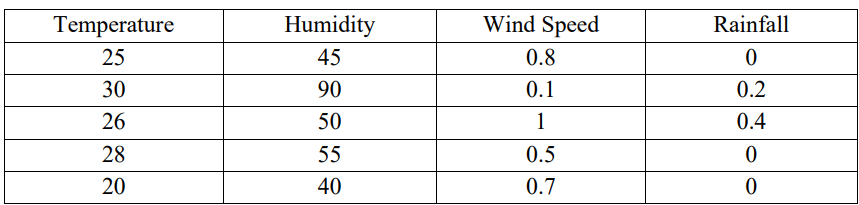

menggunakan fungsi untuk menampilkan jumlah perental sepeda dengan X yang telah ditentukan.
    - menggunakan zip untuk menggabungkan nilai dari setiap kunci dalam dictionary data (yaitu 'Temperature', 'Humidity', 'Wind speed', dan 'Rainfall') ke empat tuple yang berisi nilai-nilai yang sesuai. lalu, dikali dengan rumus regresi yang telah dihitung sebelumnya.
    - print hasilnya

In [124]:
def prediksi2(data):
    for temp, hum, wind, rainfall in zip(data['Temperature'], data['Humidity'], data['Wind speed'], data['Rainfall']):
        hasil = result.params[0] + result.params[1]*temp + result.params[2]*hum + result.params[3]*wind + result.params[4]*rainfall
        print(f"Jumlah penyewa sepeda ketika temperature {temp}°C, humidity {hum}, wind speed {wind}, serta rainfall {rainfall} adalah sebanyak {hasil:.0f}")

# Memanggil fungsi dengan data prediksi
prediksi2({
    'Temperature': [25, 30, 26, 28, 20],
    'Humidity': [45, 90, 50, 55, 40],
    'Wind speed': [0.8, 0.1, 1, 0.5, 0.7],
    'Rainfall': [0, 0.2, 0.4, 0, 0]
})


Jumlah penyewa sepeda ketika temperature 25°C, humidity 45, wind speed 0.8, serta rainfall 0 adalah sebanyak 1163
Jumlah penyewa sepeda ketika temperature 30°C, humidity 90, wind speed 0.1, serta rainfall 0.2 adalah sebanyak 927
Jumlah penyewa sepeda ketika temperature 26°C, humidity 50, wind speed 1, serta rainfall 0.4 adalah sebanyak 1138
Jumlah penyewa sepeda ketika temperature 28°C, humidity 55, wind speed 0.5, serta rainfall 0 adalah sebanyak 1167
Jumlah penyewa sepeda ketika temperature 20°C, humidity 40, wind speed 0.7, serta rainfall 0 adalah sebanyak 1042
